Here is the plan for Task 2:

Fetch & Prepare Data: Same as before (shift the "Close" price).

Train Two Models:

- Model A: Linear Regression (The Baseline).

- Model B: Random Forest Regressor (The Challenger).

Compare Metrics: We will calculate the Error (MAE) for both to see which is closer to the truth.

Visualize: We will plot both predictions against the actual price.

Importing Libraries and Modules

In [15]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

sns.set_style("whitegrid")

Step 2: Fetch the Data

We will pick a stable stock like Apple (AAPL) to ensure the data looks clean.

In [13]:
stock_symbol = "AAPL" # Apple Inc.
start_date = "2020-01-01"
end_date = "2024-01-01"

# Downloading historical stock data using yfinance
print(f"Downloading data for {stock_symbol}...")

df = yf.download(tickers= stock_symbol, start=start_date, end=end_date)

# Inspecting the data
print(df.head())
print(df.info())

C:\Users\msale\AppData\Local\Temp\ipykernel_26172\2633804765.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers= stock_symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468277  72.528597  71.223274  71.476615  135480400
2020-01-03  71.763725  72.523754  71.539337  71.696167  146322800
2020-01-06  72.335556  72.374162  70.634539  70.885472  118387200
2020-01-07  71.995384  72.600991  71.775819  72.345235  108872000
2020-01-08  73.153488  73.455087  71.698574  71.698574  132079200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1006 non-null   float64
 1   (High, AAPL)    1006 non-null   float64
 2   (Low, AAPL)     1006 non-null   float64
 3   (Open, AAPL)    1006 non-null   float64
 4   (Volume, AAPL)  1006 non-null   int64  
dtypes: float64(4), int64(1)
memo

Preprocessing and Preparing Data(The Critical Step)

Here is where we handle the "Next Day" requirement. We create a new column called Next_Close by shifting the Close price back by one day.

In [16]:
# Creating a new column 'Next_Close' which is the 'Close' price shifted by -1
# This aligns Today's features with Tomorrow's price
df['Next_Close'] = df['Close'].shift(-1)

# Drop the last row because it will have a NaN value (no "tomorrow" for the last day)
df = df.dropna()

# Define Features (X) and Target (y)
# We use Open, High, Low, and Volume to predict Next_Close
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Next_Close']

print("Data prepared for training.")
print(X.head())
print(y.head())

Data prepared for training.
Price            Open       High        Low     Volume
Ticker           AAPL       AAPL       AAPL       AAPL
Date                                                  
2020-01-02  71.476615  72.528597  71.223274  135480400
2020-01-03  71.696167  72.523754  71.539337  146322800
2020-01-06  70.885472  72.374162  70.634539  118387200
2020-01-07  72.345235  72.600991  71.775819  108872000
2020-01-08  71.698574  73.455087  71.698574  132079200
Date
2020-01-02    71.763725
2020-01-03    72.335556
2020-01-06    71.995384
2020-01-07    73.153488
2020-01-08    74.707336
Name: Next_Close, dtype: float64


In [18]:
# Splitting into Training and Testing sets (80% train, 20% test)
# shuffle=False is crucial for time series! We don't want to train on "future" data to predict the "past".
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training Data: {len(X_train)} days")
print(f"Testing Data: {len(X_test)} days")

Training Data: 804 days
Testing Data: 201 days


Train & Predict (The Comparison)

In [19]:
# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# --- Model 2: Random Forest Regressor ---
# n_estimators=100 means we use 100 different decision trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# --- Evaluation Metrics ---
lr_mae = mean_absolute_error(y_test, lr_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)

print("--- Model Comparison ---")
print(f"Linear Regression MAE: ${lr_mae:.2f}")
print(f"Random Forest MAE:     ${rf_mae:.2f}")

if lr_mae < rf_mae:
    print("\nWinner: Linear Regression (Simpler is sometimes better!)")
else:
    print("\nWinner: Random Forest (Better at complex patterns!)")

--- Model Comparison ---
Linear Regression MAE: $1.66
Random Forest MAE:     $7.53

Winner: Linear Regression (Simpler is sometimes better!)


Visualization and Comparing Both Model Predictions

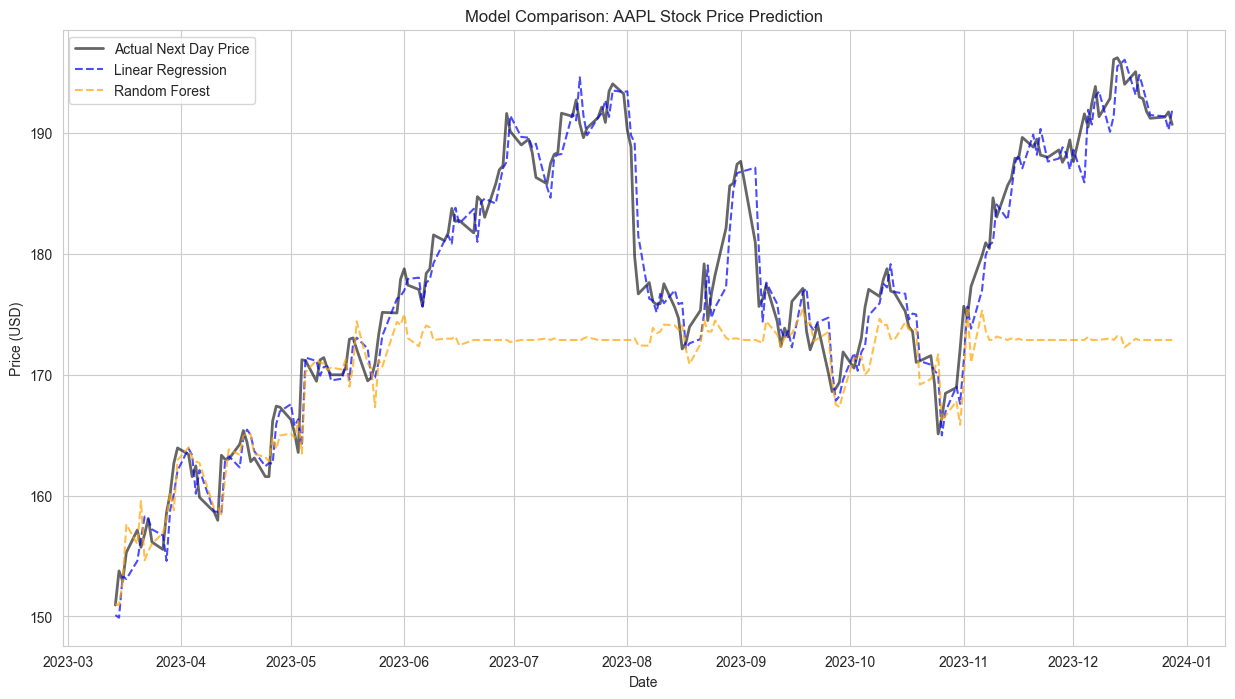

In [20]:
plt.figure(figsize=(15, 8))

# 1. Plot Actual Prices
plt.plot(y_test.index, y_test, label='Actual Next Day Price', color='black', alpha=0.6, linewidth=2)

# 2. Plot Linear Regression Predictions
plt.plot(y_test.index, lr_preds, label='Linear Regression', color='blue', linestyle='--', alpha=0.7)

# 3. Plot Random Forest Predictions
plt.plot(y_test.index, rf_preds, label='Random Forest', color='orange', linestyle='--', alpha=0.7)

plt.title(f'Model Comparison: {stock_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## 📊 Conclusion & Final Insights

### 1. Critical Finding: The "Ceiling Effect"
Our comparison revealed a major limitation in the **Random Forest** model. As seen in the visualization, the Random Forest predictions (Orange Line) "flatline" whenever the stock price exceeds approx. $175.
* **Reason:** Random Forest models cannot **extrapolate**. They are bound by the minimum and maximum values in the training data. Since AAPL stock reached new highs in the test set that were not present in the training set, the model failed to predict these higher values.

### 2. Why Linear Regression Won
The **Linear Regression** model (Blue Line) significantly outperformed the Random Forest in this time series task.
* **Reason:** Linear models learn a trend (slope) and can project that trend indefinitely into the future, making them better suited for assets with a strong upward drift like stocks.

### 3. The "Lag" Caveat
While the Linear Regression looks accurate, a closer inspection shows it effectively predicts a value very close to *yesterday's* price. This suggests the model is relying heavily on the autocorrelation of the stock (i.e., "Tomorrow will be similar to today"), which is a common baseline in financial forecasting.